In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None


### contenido del data set COVID
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [3]:
df_covid = pd.read_csv('./Covid Data.csv')

In [4]:
df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [5]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

El dataset cuenta con las enfermedades y otros factores previos al contagio del COVID, así como el tipo de atención médica que recibió el paciente, si fue hospitalizado o no, si fue intubado o no, si falleció o no, y la fecha de fallecimiento. Con estos datos se puede analizar la relación entre las enfermedades previas y el resultado del COVID, así como la relación entre el tipo de atención médica y el resultado del COVID. Se intentara predecir si el paciente falleció o no, y si fue intubado o no, con base en las enfermedades previas y el tipo de atención médica que recibió.

## Graficos con MATPLOTLIB

### frecuencia Edades de pacientes con COVID

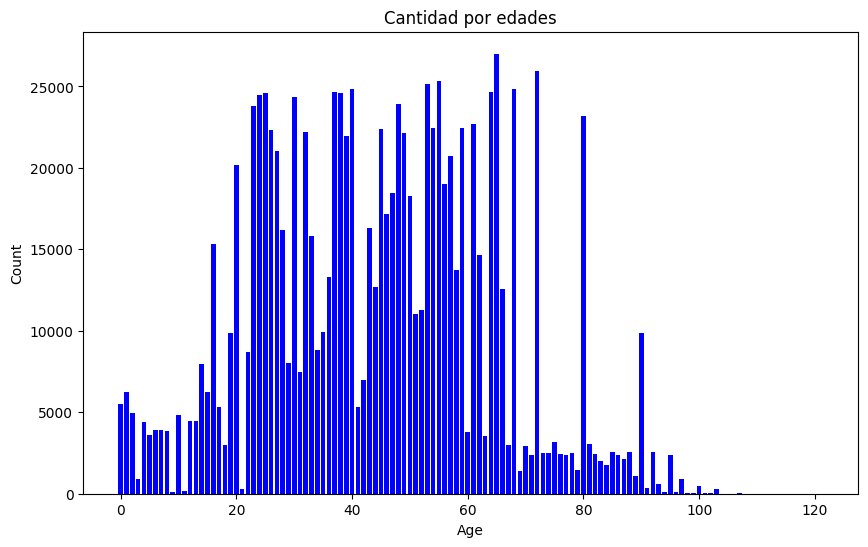

In [6]:

fig, ax = plt.subplots(figsize=(10, 6))
ax = plt.bar(df_covid['AGE'].unique(), df_covid['AGE'].value_counts(), color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Cantidad por edades')
plt.show()


### fallecidos por edades y sexo

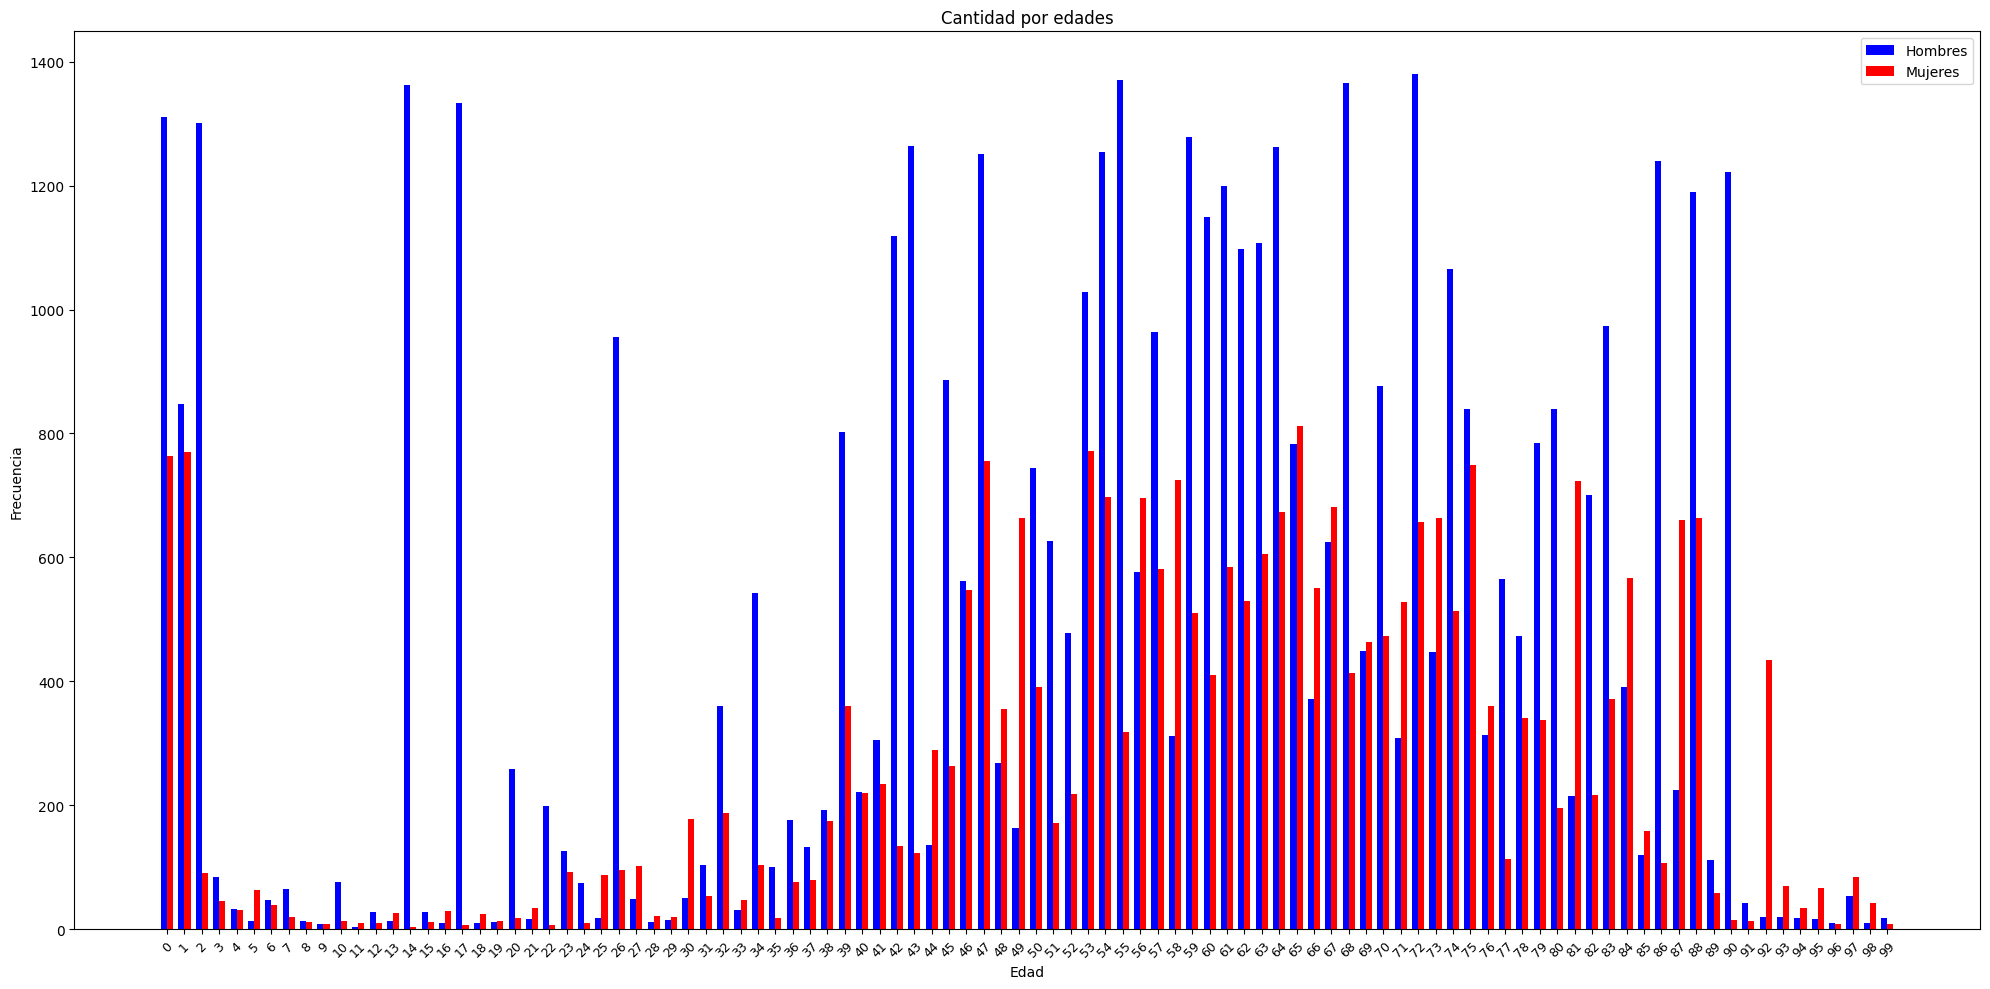

In [7]:
df_fallecidos = df_covid[df_covid['DATE_DIED'] != '9999-99-99']
df_fallecidos = df_fallecidos[df_fallecidos['AGE'] < 100]

df_covid_varon = df_fallecidos[df_fallecidos['SEX'] == 2]
df_covid_mujer = df_fallecidos[df_fallecidos['SEX'] == 1]

width = 0.35
fig, ax = plt.subplots(figsize=(20, 10))
bar1 = plt.bar(df_covid_varon['AGE'].unique() - width/2, df_covid_varon['AGE'].value_counts(), color='blue', align='center', width=width)
bar2 = plt.bar(df_covid_mujer['AGE'].unique() + width/2, df_covid_mujer['AGE'].value_counts(), color='red', align='center', width=width)
plt.legend((bar1, bar2), ('Hombres', 'Mujeres'))
plt.xticks(df_covid_varon['AGE'].unique(), rotation=45, fontsize=9)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Cantidad por edades')


fig.tight_layout()
plt.show()

### fallecidos con enfermedades cardiovasculares

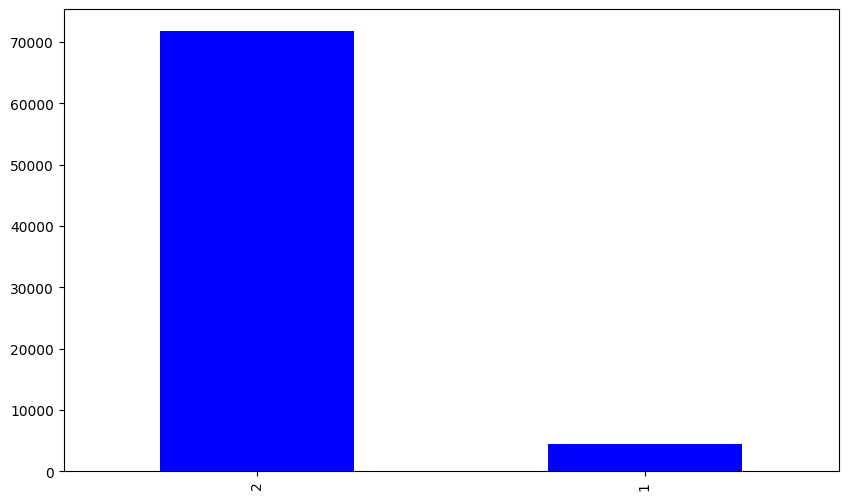

In [8]:
cardio_limpio = df_fallecidos['CARDIOVASCULAR'].replace({97: np.nan,98: np.nan}).dropna().astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
bar = cardio_limpio.value_counts().plot(kind='bar', color='blue')


## Graficos con SEABORN

 Vamos a empezar a analizar las distintas variables para poder tener una aproximacion de como se comportan los datos y poder hacer un analisis mas profundo mediante la hipotesis de que enfermedades previas al COVID pueden influir en el resultado del desarrollo de la enfermedad.

### fallecidos por sexo

<AxesSubplot: xlabel='SEX', ylabel='count'>

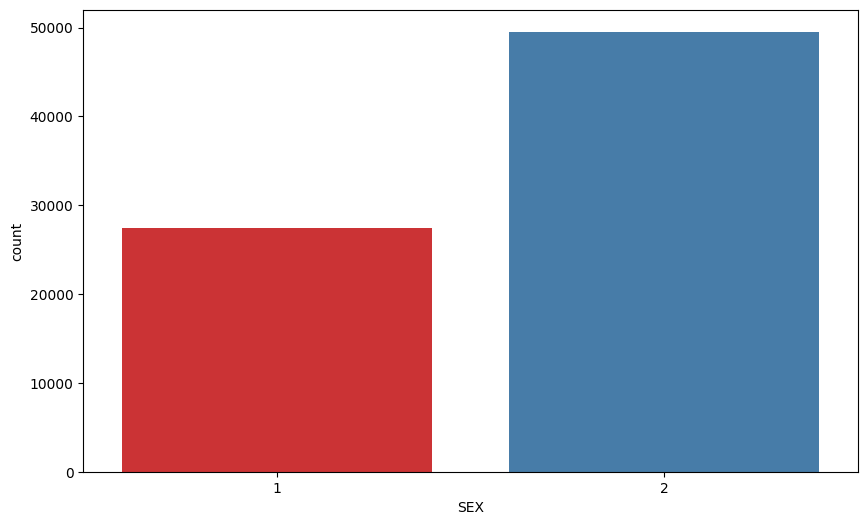

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='SEX', data=df_covid[df_covid['DATE_DIED'] != "9999-99-99"], palette='Set1')

### fallecidos por sexo y edad

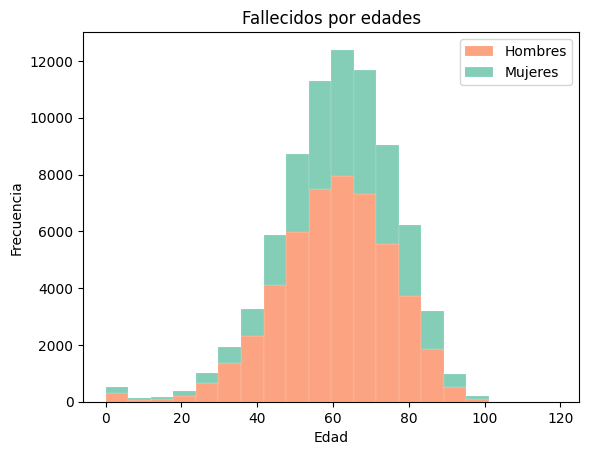

In [10]:
bar = sns.histplot(data=df_covid[df_covid['DATE_DIED'] != "9999-99-99"], x='AGE', hue="SEX", palette="Set2",  multiple="stack", alpha=.8, edgecolor="w", linewidth=0.1, bins=20)
bar.set(xlabel='Edad', ylabel='Frecuencia', title='Fallecidos por edades')
bar.legend(['Hombres', 'Mujeres'])





### fallecidos por edad y enfermedades cardiovasculares

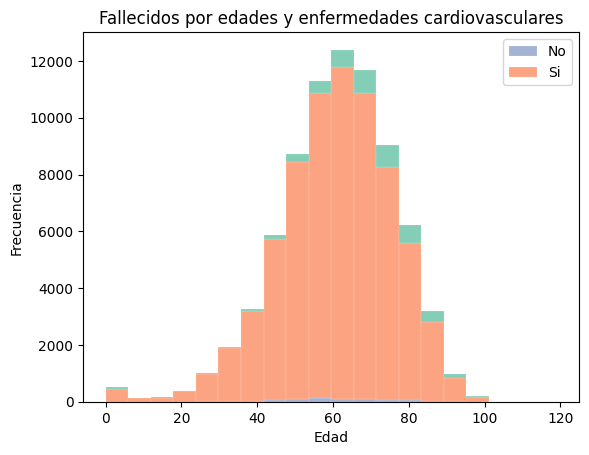

In [11]:
bar = sns.histplot(data=df_covid[df_covid['DATE_DIED'] != "9999-99-99"], x='AGE', hue="CARDIOVASCULAR", palette="Set2",  multiple="stack", alpha=.8, edgecolor="w", linewidth=0.1, bins=20)
bar.set(xlabel='Edad', ylabel='Frecuencia', title='Fallecidos por edades y enfermedades cardiovasculares')
bar.legend(['No', 'Si'])


### Del total con enfermedades cardiovasculares, sobrevivientes y fallecidos

#### Tomamos una enfermedad preexistente para empezar a comprender la incidencia de las mismas en el desarrollo de la enfermedad.

comparamos el total de pacientes con enfermedades cardiovasculares y sin enfermedadades cardiovasculares. Se puede observar un porcentaje mayor de fallecidos en los pacientes con enfermedades cardiovasculares.

In [12]:
total_cardio = df_covid[df_covid['CARDIOVASCULAR'] == 1]    
print(total_cardio['CARDIOVASCULAR'].sum())
sin_cardio = df_covid[df_covid['CARDIOVASCULAR'] == 2]

20769


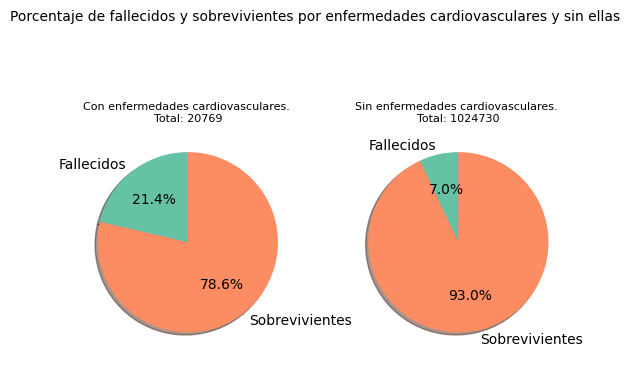

In [13]:
fallecidos_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 1) & (df_covid['DATE_DIED'] != "9999-99-99")]
sobrevivientes_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 1) & (df_covid['DATE_DIED'] == "9999-99-99")]
fallecidos_sin_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 2) & (df_covid['DATE_DIED'] != "9999-99-99")]
sobrevivientes_sin_cardio = df_covid[(df_covid['CARDIOVASCULAR'] == 2) & (df_covid['DATE_DIED'] == "9999-99-99")]
fig, ax = plt.subplots( ncols=2, nrows=1)
colores = sns.color_palette('Set2')

ax[0].pie([len(fallecidos_cardio), len(sobrevivientes_cardio)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[0].set_title('Con enfermedades cardiovasculares. \nTotal: ' + str(len(total_cardio)), fontsize=8)


ax[1].pie([len(fallecidos_sin_cardio), len(sobrevivientes_sin_cardio)], labels=['Fallecidos', 'Sobrevivientes'], autopct='%1.1f%%', shadow=True, startangle=90, colors=colores)
ax[1].set_title('Sin enfermedades cardiovasculares. \nTotal: ' + str(len(sin_cardio)), fontsize=8)

plt.suptitle('Porcentaje de fallecidos y sobrevivientes por enfermedades cardiovasculares y sin ellas', fontsize=10)
plt.show()



C:\Users\ismael\AppData\Local\Temp\ipykernel_55512\2490466195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_covid.corr(), annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size':5}, fmt='.2f')


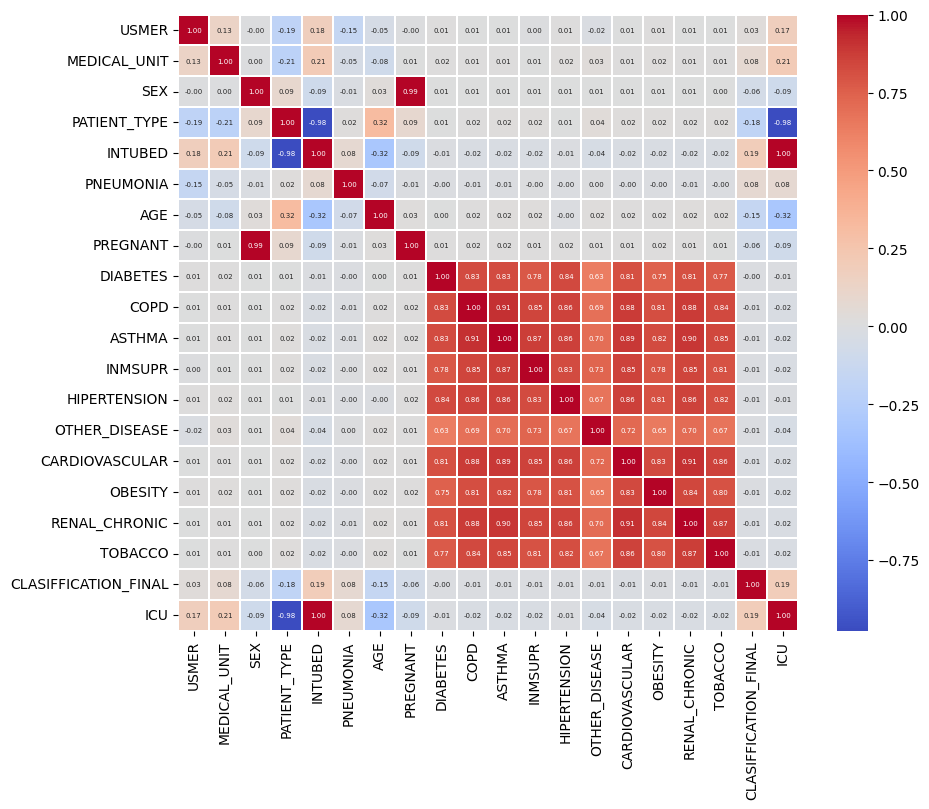

In [19]:
sns.heatmap(df_covid.corr(), annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size':5}, fmt='.2f')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()